# Suicides in Mexico

## Introduction

Suicide is defined by the WHO as the deliberate act of taking one's own life. The state where I live in Mexico has one of the highest numbers of suicides in the country, which put me into thinking what is affecting on people's mental health? Are there any factors that we can measure or notice to predict this phenomenom?

Through this project I'll take a look at the suicide numbers of Mexico taking into account each state. I'll also compare those numbers to factor such as economics, social development, among others, to established if factors can be pin pointed in order to know what is affecting the most affected societies (by state) by this phenomenom.

## Problem

Why are suicide rates higher in some regions compared to others? Can we identify factors that influence suicide occurrence?

## Numbers in Mexico

In this section I will show what the numbers of suicides are in Mexico. For this task (as some others) I took official numbers from a Government Agency in Mexico called INEGI (for its spanish acronym means: National Institute of Statistcs, Geography and Information) which is the most trustable source of statistics and information in the country.

First, let us import the _csv_ document that contains useful data. This document was downloaded from [here](https://www.inegi.org.mx/app/tabulados/interactivos/?px=Mental_07&bd=Salud).

In [93]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\Users\Marco\Claro drive\Marco\Coding\02. Portfolio\01. Python DA\01. Suicidios\suicidios.csv')
print(df)

          Entidad federativa                                         Causa  \
0         Entidad federativa                                         Causa   
1                      Total                                         Total   
2                      Total  Ahorcamiento, estrangulamiento o sofocación    
3                      Total                      Disparo de arma de fuego   
4                      Total                                Envenenamiento   
..                       ...                                           ...   
171  Entidad no especificada                                         Total   
172  Entidad no especificada  Ahorcamiento, estrangulamiento o sofocación    
173  Entidad no especificada                      Disparo de arma de fuego   
174  Entidad no especificada                                Envenenamiento   
175  Entidad no especificada                                  Otras causas   

      2019   2019.1   2019.2           2019.3   2020   2020.1  

Filtering Rows Based on condition, using Entidad federativa as condition. We filter the totals, so we input "Total"

In [94]:
totales = df[df["Entidad federativa"] == 'Total']
df[df["Entidad federativa"] == 'Total']


,Entidad federativa,Causa,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3,2021,2021.1,2021.2,2021.3
1,Total,Total,"7,223","5,906","1,313",4,"7,896","6,452","1,436",8,"8,432","6,850","1,568",14
2,Total,"Ahorcamiento, estrangulamiento o sofocación","5,992","4,988","1,001",3,"6,666","5,492","1,169",5,"7,189","5,876","1,301",12
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0
5,Total,Otras causas,273,216,56,1,299,241,56,2,290,232,57,1


From the source, we know that the decimal of each year represents a topic. As following:

 -  2019. Just the year represents the total
 - 2019.1 Year and a decimal 1 is the number of suicides of men.
 - 2019.2 Year and a decimal 2 is the number of suicides of women.
 - 2019.3 Year and a decimal 3 is the number of suicides of non specified sex.
 
 This can be represented in a Python dictionary:


In [95]:
dict = { 'Entidad federativa': 'Estado',
            'Causa': 'Causa',
            '2019': 'Suicides 2019',
            '2019.1': "Men's suicides 2019",
            '2019.2': "Women's suicides 2019",
            '2019.3': "Non specified suicides 2019",
            '2020': 'Suicides 2020',
            '2020.1': "Men's suicides 2020",
            '2020.2': "Women's suicides 2020",
            '2020.3': "Non specified suicides 2020",
            '2021': 'Suicides 2021',
            '2021.1': "Men's suicides 2021",
            '2021.2': "Women's suicides 2021",
            '2021.3': "Non specified suicides 2021"
          }
print(dict)

{'Entidad federativa': 'Estado', 'Causa': 'Causa', '2019': 'Suicides 2019', '2019.1': "Men's suicides 2019", '2019.2': "Women's suicides 2019", '2019.3': 'Non specified suicides 2019', '2020': 'Suicides 2020', '2020.1': "Men's suicides 2020", '2020.2': "Women's suicides 2020", '2020.3': 'Non specified suicides 2020', '2021': 'Suicides 2021', '2021.1': "Men's suicides 2021", '2021.2': "Women's suicides 2021", '2021.3': 'Non specified suicides 2021'}


In [96]:
df.rename(columns = dict, inplace = True)
df

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021
0,Entidad federativa,Causa,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado
1,Total,Total,"7,223","5,906","1,313",4,"7,896","6,452","1,436",8,"8,432","6,850","1,568",14
2,Total,"Ahorcamiento, estrangulamiento o sofocación","5,992","4,988","1,001",3,"6,666","5,492","1,169",5,"7,189","5,876","1,301",12
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Entidad no especificada,Total,178,151,23,4,154,131,21,2,124,111,9,4
172,Entidad no especificada,"Ahorcamiento, estrangulamiento o sofocación",125,109,13,3,126,107,17,2,103,92,8,3
173,Entidad no especificada,Disparo de arma de fuego,9,9,0,0,7,7,0,0,6,6,0,0
174,Entidad no especificada,Envenenamiento,9,6,3,0,7,6,1,0,3,2,1,0


In [97]:
totales_año = df[['Estado', 'Causa', 'Suicides 2019', 'Suicides 2020', 'Suicides 2021']]
print(totales_año)

                      Estado                                         Causa  \
0         Entidad federativa                                         Causa   
1                      Total                                         Total   
2                      Total  Ahorcamiento, estrangulamiento o sofocación    
3                      Total                      Disparo de arma de fuego   
4                      Total                                Envenenamiento   
..                       ...                                           ...   
171  Entidad no especificada                                         Total   
172  Entidad no especificada  Ahorcamiento, estrangulamiento o sofocación    
173  Entidad no especificada                      Disparo de arma de fuego   
174  Entidad no especificada                                Envenenamiento   
175  Entidad no especificada                                  Otras causas   

    Suicides 2019 Suicides 2020 Suicides 2021  
0           Tot

***

Let's select just Mexico's totals. (Mexico as a country and not ever single state on their own)

In [98]:
suicidios_mexico = totales_año[totales_año["Estado"] == 'Total'] 
suicidios_mexico

,Estado,Causa,Suicides 2019,Suicides 2020,Suicides 2021
1,Total,Total,"7,223","7,896","8,432"
2,Total,"Ahorcamiento, estrangulamiento o sofocación","5,992","6,666","7,189"
3,Total,Disparo de arma de fuego,481,532,513
4,Total,Envenenamiento,477,399,440
5,Total,Otras causas,273,299,290


***

As we can seem There are 5 different Totals in each of the 5 rows. The beforehand stated depending on the cause (or way) of the death. 

Checking the datatypes of our dataframe _suicidios_mexico_, we have:

In [99]:
suicidios_mexico.dtypes

Estado           object
Causa            object
Suicides 2019    object
Suicides 2020    object
Suicides 2021    object
dtype: object

So this is not helpful to create plots or visualizations, lets change the datatypes to int, when applicable.
Firstly, if we take a look at the numbers in suicidios_mexico, the numbers have commas when expressing numbers above a thousand. Lets remove thos commas:

In [100]:
suicidios_mexico = suicidios_mexico.replace(',','', regex=True)
suicidios_mexico

,Estado,Causa,Suicides 2019,Suicides 2020,Suicides 2021
1,Total,Total,7223,7896,8432
2,Total,Ahorcamiento estrangulamiento o sofocación,5992,6666,7189
3,Total,Disparo de arma de fuego,481,532,513
4,Total,Envenenamiento,477,399,440
5,Total,Otras causas,273,299,290


Now that we have only numbers (in a format of object, but still), lets convert them into ints:

In [101]:
suicidios_mexico['Suicides 2019'] = suicidios_mexico['Suicides 2019'].astype(str).astype(int)
suicidios_mexico['Suicides 2020'] = suicidios_mexico['Suicides 2020'].astype(str).astype(int)
suicidios_mexico['Suicides 2021'] = suicidios_mexico['Suicides 2021'].astype(str).astype(int)
suicidios_mexico.dtypes


Estado           object
Causa            object
Suicides 2019     int32
Suicides 2020     int32
Suicides 2021     int32
dtype: object

As we can see, the columns with numbers now have proper ints. Now, before plotting our chart, we can see there's a total row in our table. It's not that useful if we are going to plot the number of suicides by cause, so lets remove that row for now.

In [102]:
suicidios_mexico.drop(
    index = 1,
    axis = 0,
    inplace = True
)
suicidios_mexico

,Estado,Causa,Suicides 2019,Suicides 2020,Suicides 2021
2,Total,Ahorcamiento estrangulamiento o sofocación,5992,6666,7189
3,Total,Disparo de arma de fuego,481,532,513
4,Total,Envenenamiento,477,399,440
5,Total,Otras causas,273,299,290


Now, let's plot the number of suicides taking into account the way it was perpetrated.

### Way of suicides were commited in all Mexico during 2019

<AxesSubplot:ylabel='Suicides 2019'>

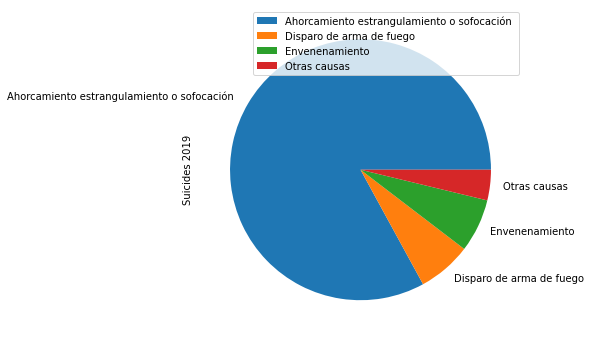

In [103]:
suicidios_mexico.groupby(['Causa']).sum().plot(kind='pie', figsize= (10, 6), y = 'Suicides 2019')

### Way of suicides were commited in all Mexico during 2020

<AxesSubplot:ylabel='Suicides 2020'>

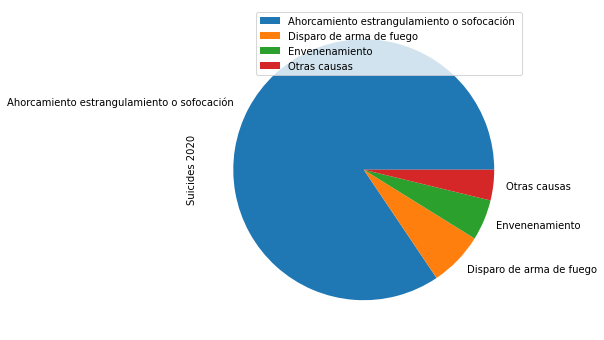

In [104]:
suicidios_mexico.groupby(['Causa']).sum().plot(kind='pie', figsize= (10, 6), y = 'Suicides 2020')

<AxesSubplot:ylabel='Suicides 2021'>

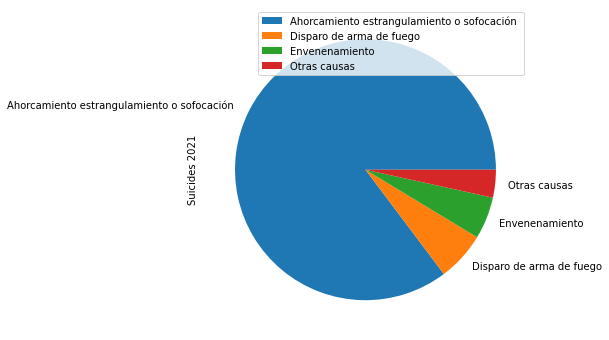

In [105]:
suicidios_mexico.groupby(['Causa']).sum().plot(kind='pie', figsize= (10, 6), y = 'Suicides 2021')

Now, let's compare last three years of suicides to compare them and see how the numbers and tendency is going.

First, I'll add a new row at the bottom of the dataframe, it will contain the sum of all the different types of suicides per year. (We took the respective row out in previous step in order to plot our pie charts, and to demonstrate how to drop a row)

In [106]:
suicidios_mexico.loc["Suma"] = suicidios_mexico.sum(numeric_only=True, axis=0)
suicidios_mexico

,Estado,Causa,Suicides 2019,Suicides 2020,Suicides 2021
2,Total,Ahorcamiento estrangulamiento o sofocación,5992.0,6666.0,7189.0
3,Total,Disparo de arma de fuego,481.0,532.0,513.0
4,Total,Envenenamiento,477.0,399.0,440.0
5,Total,Otras causas,273.0,299.0,290.0
Suma,NaN,NaN,7223.0,7896.0,8432.0


Now that we have it again, let's create it a dataframe containing only the Sums of the suicides each year.

In [107]:
columnas = ['Suicides 2019', 'Suicides 2020', 'Suicides 2021']
fila = ["Suma"]
fila_suma = suicidios_mexico.loc[fila, columnas]
fila_suma


,Suicides 2019,Suicides 2020,Suicides 2021
Suma,7223.0,7896.0,8432.0


Now, we can easily represent those totals in a plot.

<AxesSubplot:>

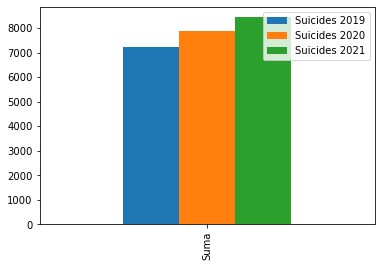

In [108]:
fila_suma.plot.bar()

As we can see, in the last three years the numbers of suicides have been increasing each year.

Now, let's analize the states situation in Mexico. Let's find the top and bottom 5 of states in suicides in Mexico.

## Numbers in Mexican states

In [109]:
df.head()

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021
0,Entidad federativa,Causa,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado
1,Total,Total,"7,223","5,906","1,313",4,"7,896","6,452","1,436",8,"8,432","6,850","1,568",14
2,Total,"Ahorcamiento, estrangulamiento o sofocación","5,992","4,988","1,001",3,"6,666","5,492","1,169",5,"7,189","5,876","1,301",12
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0


In [110]:
df_states = df.drop(0)
df_states

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021
1,Total,Total,"7,223","5,906","1,313",4,"7,896","6,452","1,436",8,"8,432","6,850","1,568",14
2,Total,"Ahorcamiento, estrangulamiento o sofocación","5,992","4,988","1,001",3,"6,666","5,492","1,169",5,"7,189","5,876","1,301",12
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0
5,Total,Otras causas,273,216,56,1,299,241,56,2,290,232,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Entidad no especificada,Total,178,151,23,4,154,131,21,2,124,111,9,4
172,Entidad no especificada,"Ahorcamiento, estrangulamiento o sofocación",125,109,13,3,126,107,17,2,103,92,8,3
173,Entidad no especificada,Disparo de arma de fuego,9,9,0,0,7,7,0,0,6,6,0,0
174,Entidad no especificada,Envenenamiento,9,6,3,0,7,6,1,0,3,2,1,0


In [111]:
df_states = df_states.replace(',','', regex=True)


In [112]:
df_states

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021
1,Total,Total,7223,5906,1313,4,7896,6452,1436,8,8432,6850,1568,14
2,Total,Ahorcamiento estrangulamiento o sofocación,5992,4988,1001,3,6666,5492,1169,5,7189,5876,1301,12
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0
5,Total,Otras causas,273,216,56,1,299,241,56,2,290,232,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Entidad no especificada,Total,178,151,23,4,154,131,21,2,124,111,9,4
172,Entidad no especificada,Ahorcamiento estrangulamiento o sofocación,125,109,13,3,126,107,17,2,103,92,8,3
173,Entidad no especificada,Disparo de arma de fuego,9,9,0,0,7,7,0,0,6,6,0,0
174,Entidad no especificada,Envenenamiento,9,6,3,0,7,6,1,0,3,2,1,0


In [113]:
df_states[['Suicides 2019', 'Suicides 2020', 'Suicides 2021']] = df_states[['Suicides 2019', 'Suicides 2020', 'Suicides 2021']].astype(str).astype(int)
df_states.dtypes

Estado                         object
Causa                          object
Suicides 2019                   int32
Men's suicides 2019            object
Women's suicides 2019          object
Non specified suicides 2019    object
Suicides 2020                   int32
Men's suicides 2020            object
Women's suicides 2020          object
Non specified suicides 2020    object
Suicides 2021                   int32
Men's suicides 2021            object
Women's suicides 2021          object
Non specified suicides 2021    object
dtype: object

In [114]:
df_states['Total'] = df_states['Suicides 2019'] + df_states['Suicides 2020'] + df_states['Suicides 2021']
df_states



,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021,Total
1,Total,Total,7223,5906,1313,4,7896,6452,1436,8,8432,6850,1568,14,23551
2,Total,Ahorcamiento estrangulamiento o sofocación,5992,4988,1001,3,6666,5492,1169,5,7189,5876,1301,12,19847
3,Total,Disparo de arma de fuego,481,437,44,0,532,487,44,1,513,476,36,1,1526
4,Total,Envenenamiento,477,265,212,0,399,232,167,0,440,266,174,0,1316
5,Total,Otras causas,273,216,56,1,299,241,56,2,290,232,57,1,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Entidad no especificada,Total,178,151,23,4,154,131,21,2,124,111,9,4,456
172,Entidad no especificada,Ahorcamiento estrangulamiento o sofocación,125,109,13,3,126,107,17,2,103,92,8,3,354
173,Entidad no especificada,Disparo de arma de fuego,9,9,0,0,7,7,0,0,6,6,0,0,22
174,Entidad no especificada,Envenenamiento,9,6,3,0,7,6,1,0,3,2,1,0,19


In [115]:
df_states.Estado.unique()

array(['Total', 'Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas',
       'Extranjero', 'Entidad no especificada'], dtype=object)

In [116]:
states_list = ['Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']

In [117]:
states = df_states[df_states.Estado.isin(states_list)]
states

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021,Total
6,Aguascalientes,Total,157,129,28,0,181,157,24,0,174,143,31,0,512
7,Aguascalientes,Ahorcamiento estrangulamiento o sofocación,139,117,22,0,165,142,23,0,150,123,27,0,454
8,Aguascalientes,Disparo de arma de fuego,5,5,0,0,10,10,0,0,7,7,0,0,22
9,Aguascalientes,Envenenamiento,11,6,5,0,5,4,1,0,11,9,2,0,27
10,Aguascalientes,Otras causas,2,1,1,0,1,1,0,0,6,4,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Zacatecas,Total,117,93,24,0,126,107,19,0,130,110,20,0,373
162,Zacatecas,Ahorcamiento estrangulamiento o sofocación,83,64,19,0,103,89,14,0,99,88,11,0,285
163,Zacatecas,Disparo de arma de fuego,18,17,1,0,14,12,2,0,17,14,3,0,49
164,Zacatecas,Envenenamiento,11,7,4,0,7,4,3,0,9,4,5,0,27


In [118]:
cols = ['Total']

states_1 = states[states.Causa.isin(cols)]
states_1

,Estado,Causa,Suicides 2019,Men's suicides 2019,Women's suicides 2019,Non specified suicides 2019,Suicides 2020,Men's suicides 2020,Women's suicides 2020,Non specified suicides 2020,Suicides 2021,Men's suicides 2021,Women's suicides 2021,Non specified suicides 2021,Total
6,Aguascalientes,Total,157,129,28,0,181,157,24,0,174,143,31,0,512
11,Baja California,Total,169,143,26,0,97,87,10,0,121,104,17,0,387
16,Baja California Sur,Total,59,56,3,0,67,59,8,0,58,53,5,0,184
21,Campeche,Total,95,85,10,0,70,48,22,0,110,91,19,0,275
26,Coahuila de Zaragoza,Total,261,215,46,0,273,235,38,0,293,248,45,0,827
31,Colima,Total,39,34,5,0,50,40,10,0,77,69,8,0,166
36,Chiapas,Total,200,174,26,0,203,168,35,0,245,192,53,0,648
41,Chihuahua,Total,400,319,81,0,541,432,103,6,572,442,120,10,1513
46,Ciudad de México,Total,234,187,47,0,450,352,98,0,352,268,84,0,1036
51,Durango,Total,127,103,24,0,115,87,28,0,139,110,29,0,381


In [119]:
states_2 = states_1[['Estado', 'Total']]
states_2

,Estado,Total
6,Aguascalientes,512
11,Baja California,387
16,Baja California Sur,184
21,Campeche,275
26,Coahuila de Zaragoza,827
31,Colima,166
36,Chiapas,648
41,Chihuahua,1513
46,Ciudad de México,1036
51,Durango,381


In [120]:
states_2.nlargest(n=5, columns='Total')

,Estado,Total
76,México,2483
71,Jalisco,1988
41,Chihuahua,1513
56,Guanajuato,1443
96,Nuevo León,1069


In [121]:
states_2.nsmallest(n=5, columns='Total')

,Estado,Total
31,Colima,166
61,Guerrero,169
146,Tlaxcala,178
16,Baja California Sur,184
91,Nayarit,260


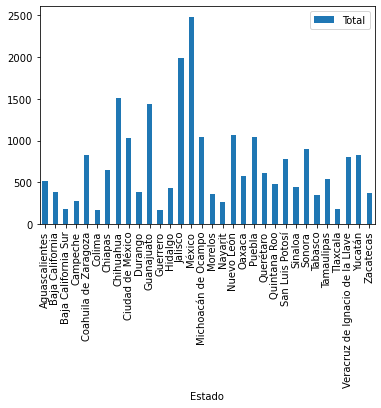

In [122]:
ax = states_2.plot.bar(x='Estado', y="Total")

As we can see, the top 5 states with suicides are: Mexico, Jalisco, Chihuahua, Guanajuato, Nuevo León.
Meanwhile, the bottom 5 states are: Colima, Guerrero, Tlaxcala, Baja California Sur, Nayarit.


Now, even if we have the top 5 of suicides, we shouldn't get confused: each state has a different population, so we shoudl take that factor into account to analyze suicide rates of each state.

Let's add the population factor to the find out which are the states with the highest suicide rates despite its population. First, let's use the same source (INEGI) to bring the population of each state.

In [123]:
population = pd.read_excel('population.xlsx', index_col=0)

In [124]:
population

,2020
Entidad federativa,
Estados Unidos Mexicanos,126014024
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363
Coahuila de Zaragoza,3146771
Colima,731391
Chiapas,5543828
Chihuahua,3741869


First, let's clean our data, removing the total of the country ("Estados Unidos Mexicanos")

In [125]:
population_states = population.drop('Estados Unidos Mexicanos')

In [126]:
population_states

,2020
Entidad federativa,
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363
Coahuila de Zaragoza,3146771
Colima,731391
Chiapas,5543828
Chihuahua,3741869
Ciudad de México,9209944


In [127]:
population_states.rename(columns = {'Entidad federativa':'Estado'}, inplace = True)

Joining population with dataframe that contains suicide totals (2019-2021) in each state.

In [128]:
population_states.dtypes

2020    int64
dtype: object

In [129]:
states_2.dtypes

Estado    object
Total      int32
dtype: object

In [130]:
pop_suic = population[['2020']].copy()
pop_suic

,2020
Entidad federativa,
Estados Unidos Mexicanos,126014024
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363
Coahuila de Zaragoza,3146771
Colima,731391
Chiapas,5543828
Chihuahua,3741869


In [131]:
pop_suic.drop(['Estados Unidos Mexicanos'], axis=0, inplace=True)
pop_suic

,2020
Entidad federativa,
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363
Coahuila de Zaragoza,3146771
Colima,731391
Chiapas,5543828
Chihuahua,3741869
Ciudad de México,9209944


In [132]:
pop_suic['Suicides'] = states_2[['Total']].copy()
pop_suic

,2020,Suicides
Entidad federativa,,
Aguascalientes,1425607,NaN
Baja California,3769020,NaN
Baja California Sur,798447,NaN
Campeche,928363,NaN
Coahuila de Zaragoza,3146771,NaN
Colima,731391,NaN
Chiapas,5543828,NaN
Chihuahua,3741869,NaN
Ciudad de México,9209944,NaN


In [133]:
states_3 = states_2.set_index('Estado')
states_3

,Total
Estado,
Aguascalientes,512
Baja California,387
Baja California Sur,184
Campeche,275
Coahuila de Zaragoza,827
Colima,166
Chiapas,648
Chihuahua,1513
Ciudad de México,1036


In [134]:
pop_suic

,2020,Suicides
Entidad federativa,,
Aguascalientes,1425607,NaN
Baja California,3769020,NaN
Baja California Sur,798447,NaN
Campeche,928363,NaN
Coahuila de Zaragoza,3146771,NaN
Colima,731391,NaN
Chiapas,5543828,NaN
Chihuahua,3741869,NaN
Ciudad de México,9209944,NaN


In [135]:
pop_suic.drop(['Suicides'], axis=1, inplace=True)

In [136]:
pop_suic['Suicides'] = states_3[['Total']].copy()

In [137]:
pop_suic.rename(columns = {'2020':'Population'}, inplace = True)


In [138]:
pop_suic['Suicides per 100k'] = (pop_suic['Suicides'] / pop_suic['Population']) * 100000


In [139]:
pop_suic['Suicides per 100k'] = pop_suic['Suicides per 100k'].astype(float).round(2)
pop_suic

,Population,Suicides,Suicides per 100k
Entidad federativa,,,
Aguascalientes,1425607,512,35.91
Baja California,3769020,387,10.27
Baja California Sur,798447,184,23.04
Campeche,928363,275,29.62
Coahuila de Zaragoza,3146771,827,26.28
Colima,731391,166,22.70
Chiapas,5543828,648,11.69
Chihuahua,3741869,1513,40.43
Ciudad de México,9209944,1036,11.25


Finding the 5 largest rates of suicides per 100k population.

In [140]:
pop_suic['Suicides per 100k'].nlargest(n=5)

Entidad federativa
Chihuahua         40.43
Aguascalientes    35.91
Yucatán           35.68
Sonora            30.39
Campeche          29.62
Name: Suicides per 100k, dtype: float64

Finding the 5 lowest rates of suicides per 100k population.

In [141]:
pop_suic['Suicides per 100k'].nsmallest(n=5)

Entidad federativa
Guerrero                            4.77
Veracruz de Ignacio de la Llave    10.01
Baja California                    10.27
Ciudad de México                   11.25
Chiapas                            11.69
Name: Suicides per 100k, dtype: float64

Due to its importance, we should sort the dataframe from largest to lowest rate of suicides.

In [142]:
pop_suic.sort_values(by=['Suicides per 100k'], ascending = False)

,Population,Suicides,Suicides per 100k
Entidad federativa,,,
Chihuahua,3741869,1513,40.43
Aguascalientes,1425607,512,35.91
Yucatán,2320898,828,35.68
Sonora,2944840,895,30.39
Campeche,928363,275,29.62
San Luis Potosí,2822255,779,27.60
Coahuila de Zaragoza,3146771,827,26.28
Querétaro,2368467,607,25.63
Quintana Roo,1857985,476,25.62


<AxesSubplot:xlabel='Entidad federativa'>

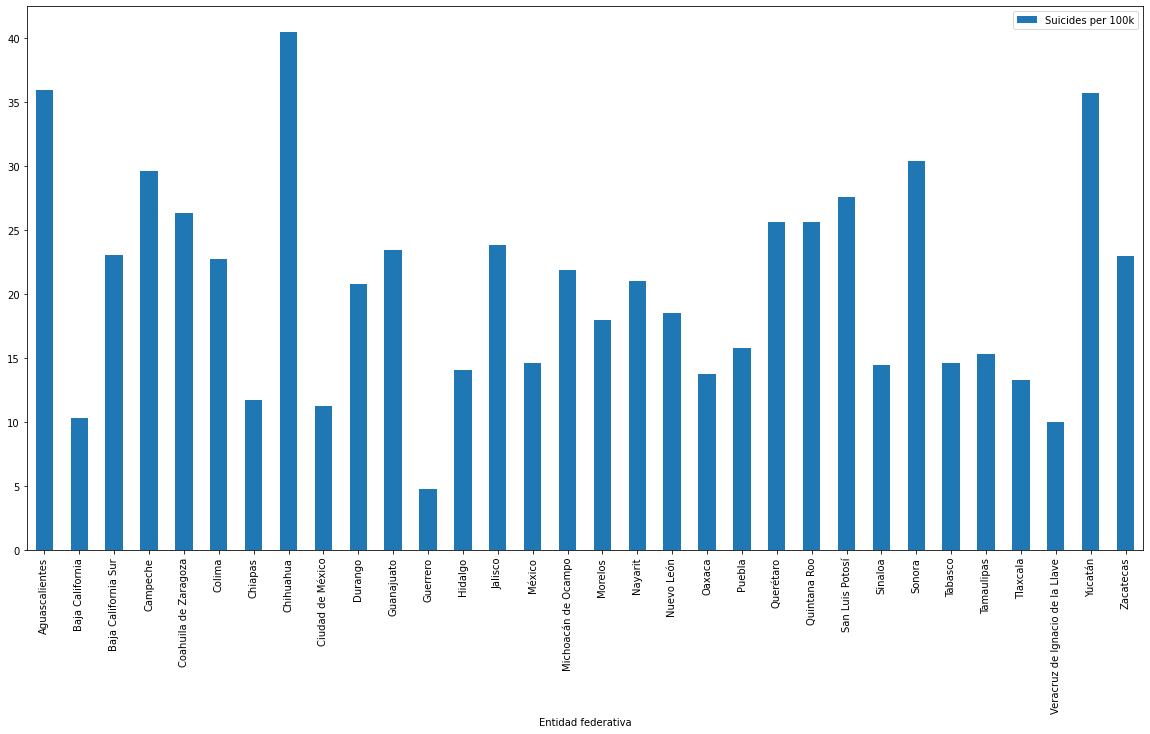

In [143]:
pop_suic.plot.bar(y='Suicides per 100k', use_index=True, figsize=(20, 10))

In [144]:
pop_suic['x1'] = pop_suic.index

<AxesSubplot:xlabel='x1', ylabel='Suicides per 100k'>

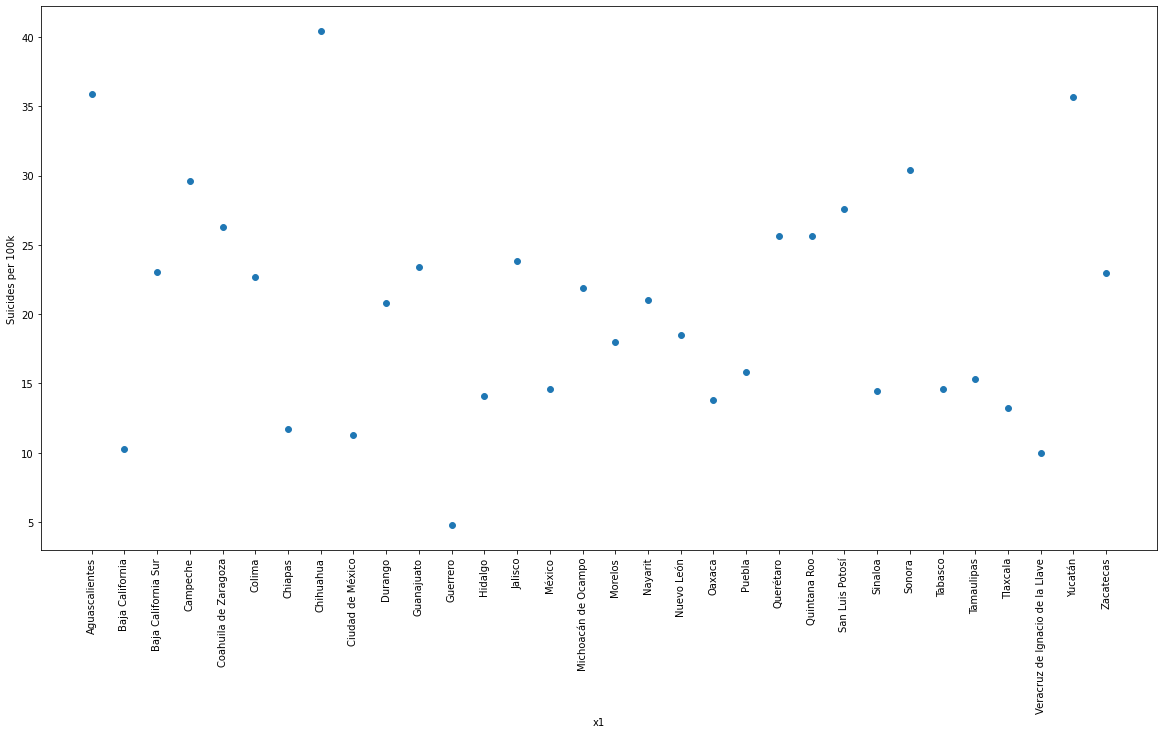

In [145]:
pop_suic.plot.scatter(y ='Suicides per 100k', x = 'x1' , s = 35, rot=90, figsize=(20,10))

## Searching correlations of suicide rate with socioeconomic factors.

Now that we've located a comprehensible rate of suicides in each state in Mexico, and the top and bottom 5 states with suicides (and also we graph this rate), let's look for correlation with socioeconomic factors to see if we can establish at least some insights of how the social aspect affects suicide occurance.

First we import a xlsx file containing GDP per capita, scholarity and unemployment rates of each state.

In [146]:
factors = pd.read_excel(r'C:\Users\Marco\Google Drive\Data Analysis\Python\Portfolio\SuicidiosMex\Factores.xlsx')

In [147]:
factors

,Entidad federativa,PIB per capita,Años de estudios (2020),Desocupación (2021),Satisfacción con tiempo para ocio,Satisfacción con la vida,Calidad de la red social de soporte,Casos de depresión por cada 100k habitantes
0,Aguascalientes,142703,10.35,4.12,7.8,8.6,71.9,71.03
1,Baja California Sur,151590,10.20,2.48,7.8,8.7,77.4,98.19
2,Baja California,152317,10.34,4.06,7.9,8.6,81.8,83.76
3,Campeche,481697,9.63,2.96,7.8,8.3,76.0,83.15
4,Chiapas,44387,7.78,3.17,8.0,8.8,70.0,17.03
5,Chihuahua,141532,10.00,3.37,7.7,8.8,72.9,158.25
6,Ciudad de México,316761,11.48,6.86,7.5,8.5,72.1,137.88
7,Coahuila de Zaragoza,166389,10.43,4.92,8.1,8.7,74.5,34.49
8,Colima,128953,10.05,3.11,8.0,8.2,79.7,113.23
9,Durango,101500,9.75,4.10,7.9,8.5,73.9,183.84


To add some clarity in english, let's change the columns name from spanish to english.

In [148]:
factors = factors.rename(columns={"PIB per capita":"GDP per capita",  "Años de estudios (2020)": "Years of schooling", "Desocupación (2021)": "Unemployment rate", "Satisfacción con tiempo para ocio":"Satisfaction with leisure time","Satisfacción con la vida":"Satisfaction with life","Calidad de la red social de soporte":"Social network quality", "Casos de depresión por cada 100k habitantes":"Depression cases per 100k population"})

In [149]:
factors

,Entidad federativa,GDP per capita,Years of schooling,Unemployment rate,Satisfaction with leisure time,Satisfaction with life,Social network quality,Depression cases per 100k population
0,Aguascalientes,142703,10.35,4.12,7.8,8.6,71.9,71.03
1,Baja California Sur,151590,10.20,2.48,7.8,8.7,77.4,98.19
2,Baja California,152317,10.34,4.06,7.9,8.6,81.8,83.76
3,Campeche,481697,9.63,2.96,7.8,8.3,76.0,83.15
4,Chiapas,44387,7.78,3.17,8.0,8.8,70.0,17.03
5,Chihuahua,141532,10.00,3.37,7.7,8.8,72.9,158.25
6,Ciudad de México,316761,11.48,6.86,7.5,8.5,72.1,137.88
7,Coahuila de Zaragoza,166389,10.43,4.92,8.1,8.7,74.5,34.49
8,Colima,128953,10.05,3.11,8.0,8.2,79.7,113.23
9,Durango,101500,9.75,4.10,7.9,8.5,73.9,183.84


To add some clarity to each column: 
* _GDP per capita_ is measured in pesos an represents how much money is earned per person a year.
* _Years of schoolin_ gives how many years an average person above 15 years old stayed at school.
* _Unemployment rate_ represents the percentage of the economically active population (people who can and wishes to work) does'n have a job at the moment. 
* _Satisfaction with leasure time_ is self reported satisfaction with leasure time, giving a number between 1-10 (10 is the maximum or complete satisfaction).
* _Satisfaction with life_ similarly is self reported satisfaction with life in general,  giving a number between 1-10 (10 is the maximum or complete satisfaction).
* _Social network quality_ represents how happy is people with the people that surrounds them, 100 is complete satisfaction.
* _Depression cases per 100k population_ represents how many new cases of people with diagnosed depression appear in a year.


We can set up the column _Entidad Federativa_ as an index.

In [150]:
factors = factors.set_index('Entidad federativa')

### Creating a new dataframe called correlations

This new dataframe will contain a few columns will contain the suicide ratio (how many suicides ina state every 100k population) and a several socioeconomic or demographic factors to see if a correlation may be detected.

The data was collected from INEGI, the National Institute of Statistics and Information in Mexico. Which can be consulted [here](https://www.inegi.org.mx/app/bienestar/)

In [151]:
correlations = pd.DataFrame()

In [152]:
correlations['Suicides ratio'] = pop_suic['Suicides per 100k']


In [153]:
correlations['GDP per capita'] = factors['GDP per capita']
correlations['Years of schooling'] = factors['Years of schooling']
correlations['Unemployment rate'] = factors['Unemployment rate']
correlations['Leisure time rate'] = factors['Satisfaction with leisure time']
correlations['Satisfaction rate'] = factors['Satisfaction with life']
correlations['Social network quality'] = factors['Social network quality']
correlations['Depression rate'] = factors['Depression cases per 100k population']

correlations

,Suicides ratio,GDP per capita,Years of schooling,Unemployment rate,Leisure time rate,Satisfaction rate,Social network quality,Depression rate
Entidad federativa,,,,,,,,
Aguascalientes,35.91,142703.0,10.35,4.12,7.8,8.6,71.9,71.03
Baja California,10.27,152317.0,10.34,4.06,7.9,8.6,81.8,83.76
Baja California Sur,23.04,151590.0,10.20,2.48,7.8,8.7,77.4,98.19
Campeche,29.62,481697.0,9.63,2.96,7.8,8.3,76.0,83.15
Coahuila de Zaragoza,26.28,166389.0,10.43,4.92,8.1,8.7,74.5,34.49
Colima,22.70,128953.0,10.05,3.11,8.0,8.2,79.7,113.23
Chiapas,11.69,44387.0,7.78,3.17,8.0,8.8,70.0,17.03
Chihuahua,40.43,141532.0,10.00,3.37,7.7,8.8,72.9,158.25
Ciudad de México,11.25,316761.0,11.48,6.86,7.5,8.5,72.1,137.88


As we can see, the row Mexico appears as NaN on the demographic factors, it represents the total of Mexico as a country. In this analysis is not of much use, so let's drop that row.

In [154]:
correlations = correlations.drop('México')

In [155]:
correlations

,Suicides ratio,GDP per capita,Years of schooling,Unemployment rate,Leisure time rate,Satisfaction rate,Social network quality,Depression rate
Entidad federativa,,,,,,,,
Aguascalientes,35.91,142703.0,10.35,4.12,7.8,8.6,71.9,71.03
Baja California,10.27,152317.0,10.34,4.06,7.9,8.6,81.8,83.76
Baja California Sur,23.04,151590.0,10.20,2.48,7.8,8.7,77.4,98.19
Campeche,29.62,481697.0,9.63,2.96,7.8,8.3,76.0,83.15
Coahuila de Zaragoza,26.28,166389.0,10.43,4.92,8.1,8.7,74.5,34.49
Colima,22.70,128953.0,10.05,3.11,8.0,8.2,79.7,113.23
Chiapas,11.69,44387.0,7.78,3.17,8.0,8.8,70.0,17.03
Chihuahua,40.43,141532.0,10.00,3.37,7.7,8.8,72.9,158.25
Ciudad de México,11.25,316761.0,11.48,6.86,7.5,8.5,72.1,137.88


In [156]:
corr = correlations.corr()
corr

,Suicides ratio,GDP per capita,Years of schooling,Unemployment rate,Leisure time rate,Satisfaction rate,Social network quality,Depression rate
Suicides ratio,1.000000,0.252575,0.301764,0.029934,0.075896,0.156379,0.262619,0.154533
GDP per capita,0.252575,1.000000,0.520147,0.325251,0.053123,0.034638,0.326093,0.075031
Years of schooling,0.301764,0.520147,1.000000,0.566276,0.140825,0.320986,0.507845,0.298077
Unemployment rate,0.029934,0.325251,0.566276,1.000000,-0.111440,-0.027729,-0.069144,-0.047368
Leisure time rate,0.075896,0.053123,0.140825,-0.111440,1.000000,0.503440,0.481462,0.238984
Satisfaction rate,0.156379,0.034638,0.320986,-0.027729,0.503440,1.000000,0.366714,0.218946
Social network quality,0.262619,0.326093,0.507845,-0.069144,0.481462,0.366714,1.000000,0.238755
Depression rate,0.154533,0.075031,0.298077,-0.047368,0.238984,0.218946,0.238755,1.000000


For more clarity, with can graph those correlations to be easier on the eye.

In [160]:
corr.style.background_gradient(cmap='coolwarm') 

,Suicides ratio,GDP per capita,Years of schooling,Unemployment rate,Leisure time rate,Satisfaction rate,Social network quality,Depression rate
Suicides ratio,1.000000,0.252575,0.301764,0.029934,0.075896,0.156379,0.262619,0.154533
GDP per capita,0.252575,1.000000,0.520147,0.325251,0.053123,0.034638,0.326093,0.075031
Years of schooling,0.301764,0.520147,1.000000,0.566276,0.140825,0.320986,0.507845,0.298077
Unemployment rate,0.029934,0.325251,0.566276,1.000000,-0.111440,-0.027729,-0.069144,-0.047368
Leisure time rate,0.075896,0.053123,0.140825,-0.111440,1.000000,0.503440,0.481462,0.238984
Satisfaction rate,0.156379,0.034638,0.320986,-0.027729,0.503440,1.000000,0.366714,0.218946
Social network quality,0.262619,0.326093,0.507845,-0.069144,0.481462,0.366714,1.000000,0.238755
Depression rate,0.154533,0.075031,0.298077,-0.047368,0.238984,0.218946,0.238755,1.000000


### Correlation's insights

There's several insights we can mention by analizing the previous chart:

1. The suicide ratio in relation to all the factors has the least correlation when compared to all other factor's relations.
2. Is not clear correlation between suicide ratio and the factors that were taken into account.
3. The highest correlations between suicide ratio were GDP per capita and Social network quality, although this should be not considered as a fact, due to it's minor correlation (0.30 and 0.26, where 1.0 is a complete correlation)

Because of this insights, it's noticable that there needs to be a whole new analysis that consideres different factors to be able to predict suicide ratio in a state in Mexico. However there are some starting points, as was mentioned in point 3.

Even when it's not the main goal, there are other notable correlations: 
* The highest correlation being Unemployment rate and Years of schooling, meaning a society with higher education tends to have a higher Unemployment rate. Which can be explained due to the lack of opportunities (specialized jobs that require a Univeristy degree) to grad students.
* There are two obvious corrolations, that make sense between Leisure time rate and Satisfaction with life and Social network quality, which means a person that is satisfied with life in general, and people surrounding them tend to appreciate better their leisure time.
* Finally, a higher number in years at school is related to a higher GDP in the region. Which makes perfect sense, because jobs tend to produce more when people are better prepared.

## Solutions

## Conclusions

## Next steps